In [120]:
#credit_card.csv bank.csv
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,log_loss
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.metrics import classification_report,confusion_matrix,RocCurveDisplay
import itertools
import warnings                   
warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:.2f}'.format

# DATA INGESTION

In [121]:
df=pd.read_csv("bank.csv",delimiter=";")
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no


In [122]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [123]:
df.duplicated().sum()

12

In [124]:
df.drop_duplicates(inplace=True)

In [125]:
df[df.duplicated()].shape

(0, 21)

In [126]:
df.duplicated().sum()

0

In [127]:
#checking unique feature names,occurance,n_times
for i in df.columns:
    print(i,'\n')
    print(df[i].unique(),'\n')
    print(df[i].nunique(),'\n')

age 

[56 57 37 40 45 59 41 24 25 29 35 54 46 50 39 30 55 49 34 52 58 32 38 44
 42 60 53 47 51 48 33 31 43 36 28 27 26 22 23 20 21 61 19 18 70 66 76 67
 73 88 95 77 68 75 63 80 62 65 72 82 64 71 69 78 85 79 83 81 74 17 87 91
 86 98 94 84 92 89] 

78 

job 

['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student'] 

12 

marital 

['married' 'single' 'divorced' 'unknown'] 

4 

education 

['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate'] 

8 

default 

['no' 'unknown' 'yes'] 

3 

housing 

['no' 'yes' 'unknown'] 

3 

loan 

['no' 'yes' 'unknown'] 

3 

contact 

['telephone' 'cellular'] 

2 

month 

['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep'] 

10 

day_of_week 

['mon' 'tue' 'wed' 'thu' 'fri'] 

5 

duration 

[ 261  149  226 ... 1246 1556 1868] 

1544 

campaign 

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 19 

In [128]:
df["job"]

0          housemaid
1           services
2           services
3             admin.
4           services
            ...     
41183        retired
41184    blue-collar
41185        retired
41186     technician
41187        retired
Name: job, Length: 41176, dtype: object

# EDA


In [129]:
df.job.replace('admin.',"admin",inplace=True)

In [130]:
df["job"]

0          housemaid
1           services
2           services
3              admin
4           services
            ...     
41183        retired
41184    blue-collar
41185        retired
41186     technician
41187        retired
Name: job, Length: 41176, dtype: object

In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   contact         41176 non-null  object 
 8   month           41176 non-null  object 
 9   day_of_week     41176 non-null  object 
 10  duration        41176 non-null  int64  
 11  campaign        41176 non-null  int64  
 12  pdays           41176 non-null  int64  
 13  previous        41176 non-null  int64  
 14  poutcome        41176 non-null  object 
 15  emp.var.rate    41176 non-null  float64
 16  cons.price.idx  41176 non-null  float64
 17  cons.conf.idx   41176 non-null 

In [132]:
df.rename(columns = {'emp.var.rate':'emp_var_rate'}, inplace = True)
df.rename(columns = {'cons.price.idx':'cons_price_idx'}, inplace = True)
df.rename(columns = {'cons.conf.idx':'cons_conf_idx'}, inplace = True)
df.rename(columns = {'nr.employed':'nr_employed'}, inplace = True)
df.rename(columns = {'euribor3m':'euribor'}, inplace = True)

In [133]:
df.head(2)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor,nr_employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no


In [134]:
## segregate numerical and categorical columns

numerical_columns=df.columns[df.dtypes!='object']
categorical_columns=df.columns[df.dtypes=='object']
print("Numerical columns:",numerical_columns)
print('Categorical Columns:',categorical_columns)

Numerical columns: Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor', 'nr_employed'],
      dtype='object')
Categorical Columns: Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')


In [135]:
numerical_data=df[numerical_columns]
numerical_data

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor,nr_employed
0,56,261,1,999,0,1.10,93.99,-36.40,4.86,5191.00
1,57,149,1,999,0,1.10,93.99,-36.40,4.86,5191.00
2,37,226,1,999,0,1.10,93.99,-36.40,4.86,5191.00
3,40,151,1,999,0,1.10,93.99,-36.40,4.86,5191.00
4,56,307,1,999,0,1.10,93.99,-36.40,4.86,5191.00
...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.10,94.77,-50.80,1.03,4963.60
41184,46,383,1,999,0,-1.10,94.77,-50.80,1.03,4963.60
41185,56,189,2,999,0,-1.10,94.77,-50.80,1.03,4963.60
41186,44,442,1,999,0,-1.10,94.77,-50.80,1.03,4963.60


In [136]:
df[numerical_columns].describe()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor,nr_employed
count,41176.00,41176.00,41176.00,41176.00,41176.00,41176.00,41176.00,41176.00,41176.00,41176.00
mean,40.02,258.32,2.57,962.46,0.17,0.08,93.58,-40.50,3.62,5167.03
std,10.42,259.31,2.77,186.94,0.49,1.57,0.58,4.63,1.73,72.25
min,17.00,0.00,1.00,0.00,0.00,-3.40,92.20,-50.80,0.63,4963.60
25%,32.00,102.00,1.00,999.00,0.00,-1.80,93.08,-42.70,1.34,5099.10
50%,38.00,180.00,2.00,999.00,0.00,1.10,93.75,-41.80,4.86,5191.00
75%,47.00,319.00,3.00,999.00,0.00,1.40,93.99,-36.40,4.96,5228.10
max,98.00,4918.00,56.00,999.00,7.00,1.40,94.77,-26.90,5.04,5228.10


In [137]:
df[categorical_columns].describe()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41176,41176,41176,41176,41176,41176,41176,41176,41176,41176,41176
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10419,24921,12164,32577,21571,33938,26135,13767,8618,35551,36537


In [138]:
cat_data=df.dtypes[df.dtypes=="object"].index
cat_data=df[cat_data]
cat_data.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,no
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,no
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,no
3,admin,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,no
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,no


In [139]:
def analysis(cat_col):
    if df[cat_col].dtypes=="object":
        #data type 
        print("Data Type\n",df[cat_col].dtypes)
        #unique data columns
        print("Unique Datas\n",df[cat_col].unique())
        #describe the data in categorical columns
        print("Describing the data\n",df[cat_col].describe())
        #unique values in categorical columns
        print("Count of each unique datas\n",df[cat_col].value_counts())
        
        sns.countplot(x=df[cat_col])
        plt.xticks(rotation=90)
        plt.show()
        sns.countplot(x=df[cat_col],hue=df.y)
        plt.xticks(rotation=90)
        plt.show()

    else:
        print("Data Type\n",df[cat_col].dtypes)
        print("Describing the data\n",df[cat_col].describe())
        print("Number of Unique data\n",df[cat_col].nunique())
        print("Unique data\n",df[cat_col].unique())

        data.groupby("y")[cat_col].mean().plot(kind="bar")
        plt.show()
        sns.scatterplot(x=cat_col,y="y",data=df)
        plt.show()
        sns.boxplot(df[cat_col])

Data Type
 object
Unique Datas
 ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
Describing the data
 count                 41176
unique                    8
top       university.degree
freq                  12164
Name: education, dtype: object
Count of each unique datas
 university.degree      12164
high.school             9512
basic.9y                6045
professional.course     5240
basic.4y                4176
basic.6y                2291
unknown                 1730
illiterate                18
Name: education, dtype: int64


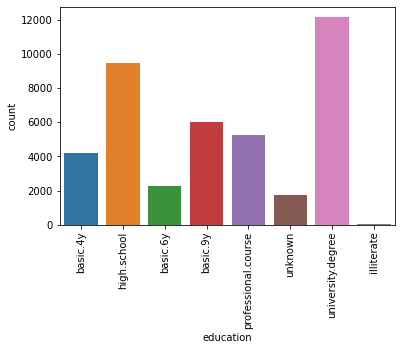

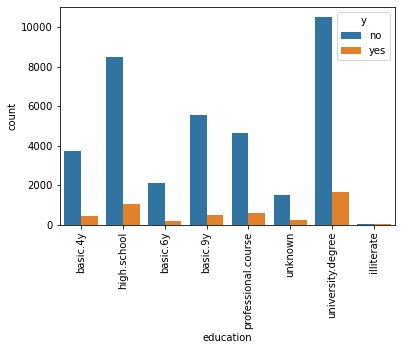

In [140]:
analysis("education")

Data Type
 object
Unique Datas
 ['no' 'yes' 'unknown']
Describing the data
 count     41176
unique        3
top         yes
freq      21571
Name: housing, dtype: object
Count of each unique datas
 yes        21571
no         18615
unknown      990
Name: housing, dtype: int64


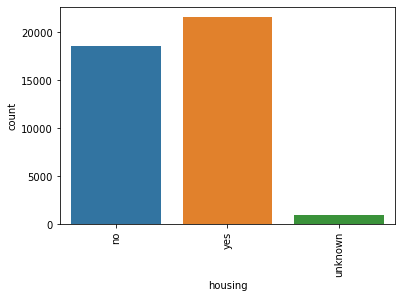

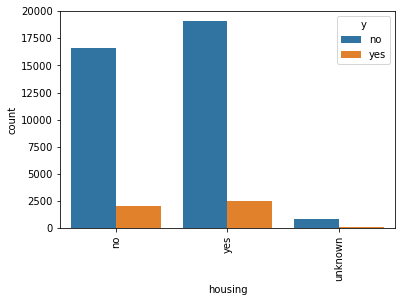

In [141]:
analysis("housing")

Data Type
 object
Unique Datas
 ['housemaid' 'services' 'admin' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
Describing the data
 count     41176
unique       12
top       admin
freq      10419
Name: job, dtype: object
Count of each unique datas
 admin            10419
blue-collar       9253
technician        6739
services          3967
management        2924
retired           1718
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64


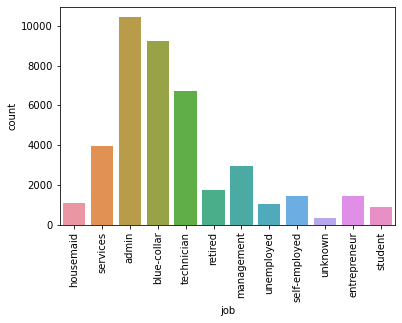

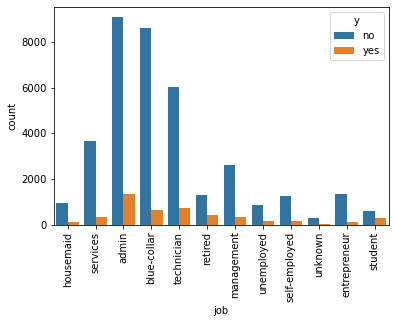

In [142]:
analysis("job")

Data Type
 object
Unique Datas
 ['married' 'single' 'divorced' 'unknown']
Describing the data
 count       41176
unique          4
top       married
freq        24921
Name: marital, dtype: object
Count of each unique datas
 married     24921
single      11564
divorced     4611
unknown        80
Name: marital, dtype: int64


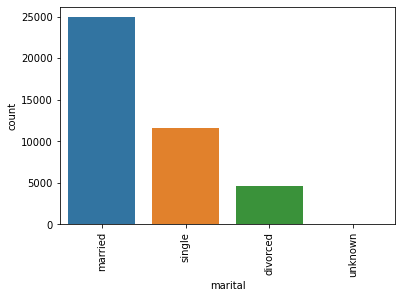

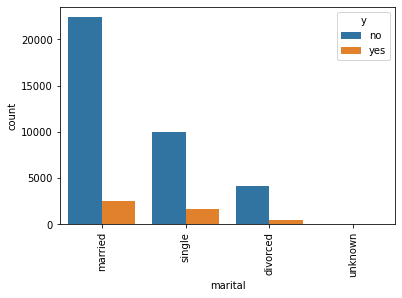

In [143]:
analysis("marital")

Data Type
 object
Unique Datas
 ['no' 'unknown' 'yes']
Describing the data
 count     41176
unique        3
top          no
freq      32577
Name: default, dtype: object
Count of each unique datas
 no         32577
unknown     8596
yes            3
Name: default, dtype: int64


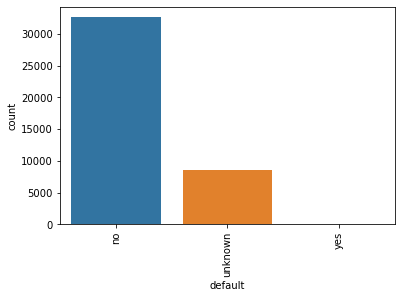

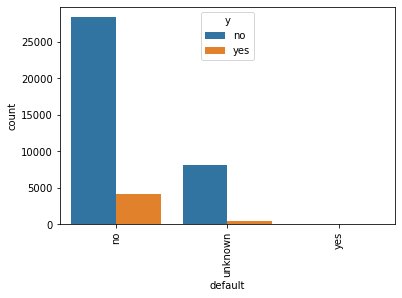

In [144]:
analysis("default")

Data Type
 object
Unique Datas
 ['no' 'yes' 'unknown']
Describing the data
 count     41176
unique        3
top          no
freq      33938
Name: loan, dtype: object
Count of each unique datas
 no         33938
yes         6248
unknown      990
Name: loan, dtype: int64


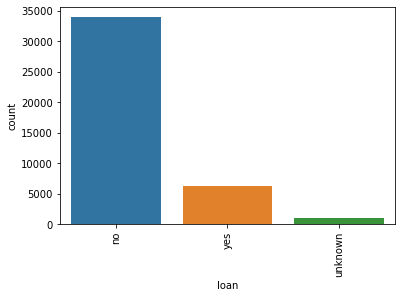

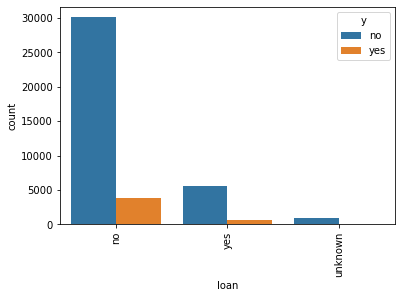

In [145]:
analysis("loan")

Data Type
 object
Unique Datas
 ['telephone' 'cellular']
Describing the data
 count        41176
unique           2
top       cellular
freq         26135
Name: contact, dtype: object
Count of each unique datas
 cellular     26135
telephone    15041
Name: contact, dtype: int64


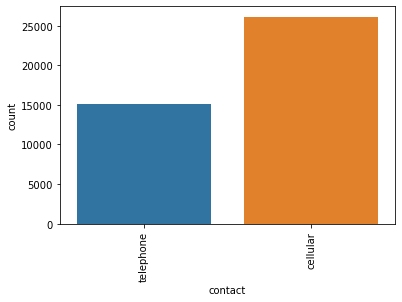

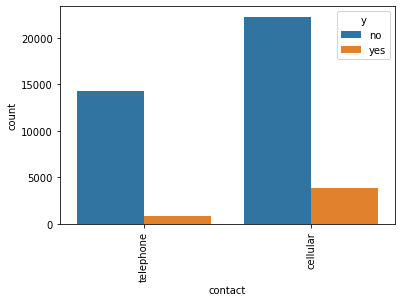

In [146]:
analysis("contact")

Data Type
 object
Unique Datas
 ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
Describing the data
 count     41176
unique       10
top         may
freq      13767
Name: month, dtype: object
Count of each unique datas
 may    13767
jul     7169
aug     6176
jun     5318
nov     4100
apr     2631
oct      717
sep      570
mar      546
dec      182
Name: month, dtype: int64


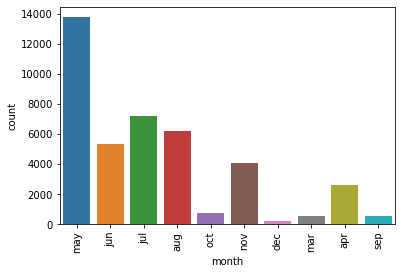

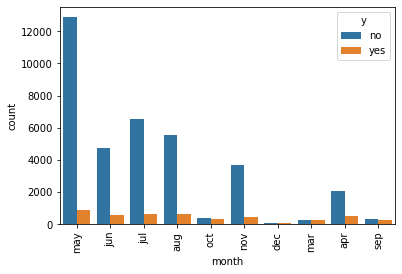

In [147]:
analysis("month")

Data Type
 object
Unique Datas
 ['mon' 'tue' 'wed' 'thu' 'fri']
Describing the data
 count     41176
unique        5
top         thu
freq       8618
Name: day_of_week, dtype: object
Count of each unique datas
 thu    8618
mon    8512
wed    8134
tue    8086
fri    7826
Name: day_of_week, dtype: int64


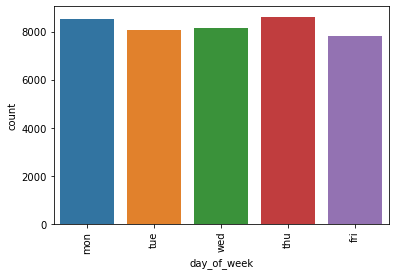

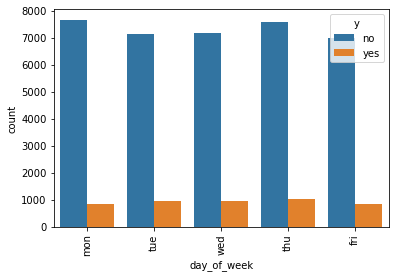

In [148]:
analysis("day_of_week")

Data Type
 object
Unique Datas
 ['nonexistent' 'failure' 'success']
Describing the data
 count           41176
unique              3
top       nonexistent
freq            35551
Name: poutcome, dtype: object
Count of each unique datas
 nonexistent    35551
failure         4252
success         1373
Name: poutcome, dtype: int64


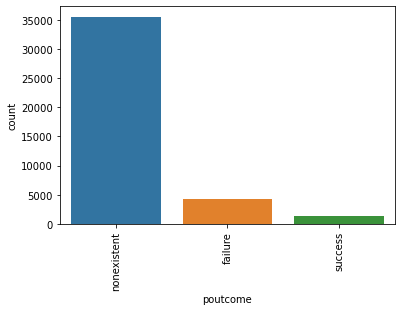

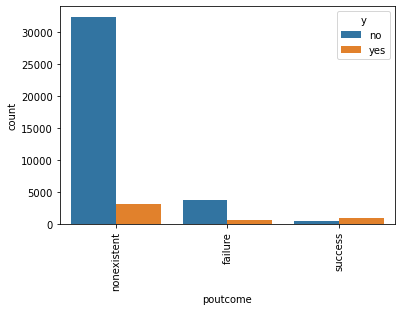

In [149]:
analysis("poutcome")

Data Type
 object
Unique Datas
 ['no' 'yes']
Describing the data
 count     41176
unique        2
top          no
freq      36537
Name: y, dtype: object
Count of each unique datas
 no     36537
yes     4639
Name: y, dtype: int64


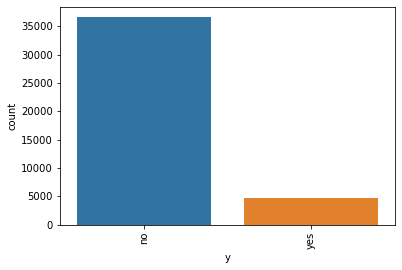

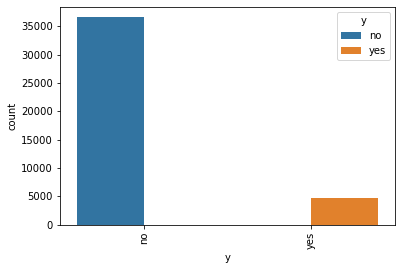

In [150]:
analysis("y")

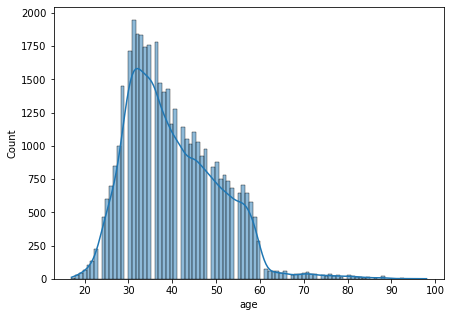

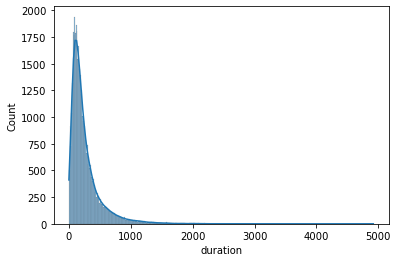

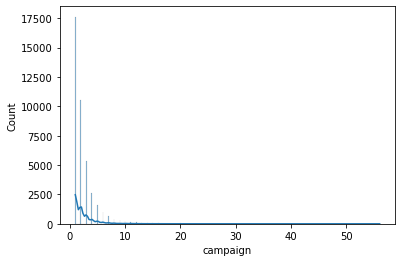

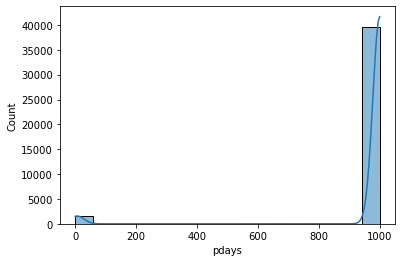

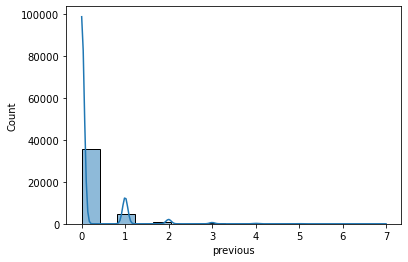

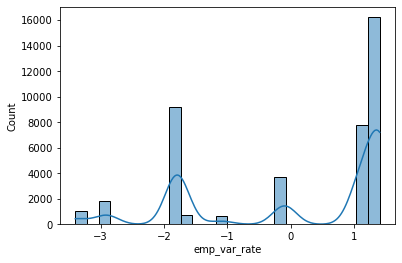

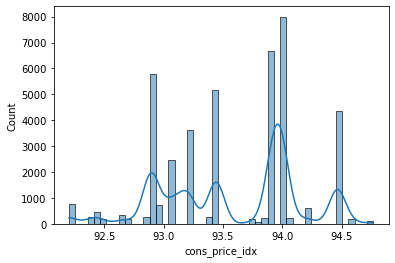

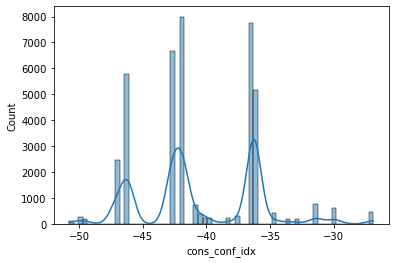

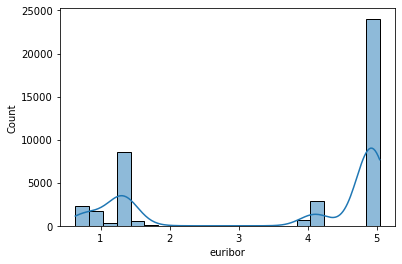

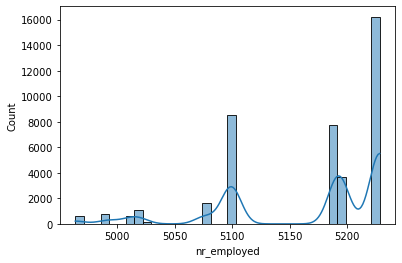

In [151]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(7,5))
x=0
for i in numerical_columns:
    sns.histplot(data=df,x=i,kde=True)
    print("\n")
    plt.show()

In [152]:
numerical_columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor', 'nr_employed'],
      dtype='object')

In [153]:
df["education"].unique()

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree',
       'illiterate'], dtype=object)

In [154]:
edu_df=df["education"]
edu_df

0                   basic.4y
1                high.school
2                high.school
3                   basic.6y
4                high.school
                ...         
41183    professional.course
41184    professional.course
41185      university.degree
41186    professional.course
41187    professional.course
Name: education, Length: 41176, dtype: object

# Data PreProcessing

In [156]:
cat_df=df[["job","marital","default","housing","loan","contact","month","day_of_week","poutcome","y"]]
num_df=df[['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor', 'nr_employed']]
lb=LabelEncoder()
for i in cat_df:
    cat_df[i]=lb.fit_transform(df[i])


In [157]:
num_df

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor,nr_employed
0,56,261,1,999,0,1.10,93.99,-36.40,4.86,5191.00
1,57,149,1,999,0,1.10,93.99,-36.40,4.86,5191.00
2,37,226,1,999,0,1.10,93.99,-36.40,4.86,5191.00
3,40,151,1,999,0,1.10,93.99,-36.40,4.86,5191.00
4,56,307,1,999,0,1.10,93.99,-36.40,4.86,5191.00
...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.10,94.77,-50.80,1.03,4963.60
41184,46,383,1,999,0,-1.10,94.77,-50.80,1.03,4963.60
41185,56,189,2,999,0,-1.10,94.77,-50.80,1.03,4963.60
41186,44,442,1,999,0,-1.10,94.77,-50.80,1.03,4963.60


In [158]:
dff=pd.concat([num_df,cat_df],axis=1)
dff.head()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor,nr_employed,job,marital,default,housing,loan,contact,month,day_of_week,poutcome,y
0,56,261,1,999,0,1.10,93.99,-36.40,4.86,5191.00,3,1,0,0,0,1,6,1,1,0
1,57,149,1,999,0,1.10,93.99,-36.40,4.86,5191.00,7,1,1,0,0,1,6,1,1,0
2,37,226,1,999,0,1.10,93.99,-36.40,4.86,5191.00,7,1,0,2,0,1,6,1,1,0
3,40,151,1,999,0,1.10,93.99,-36.40,4.86,5191.00,0,1,0,0,0,1,6,1,1,0
4,56,307,1,999,0,1.10,93.99,-36.40,4.86,5191.00,7,1,0,0,2,1,6,1,1,0


In [159]:
dfs=pd.concat([dff,edu_df],axis=1)
dfs.head()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor,nr_employed,...,marital,default,housing,loan,contact,month,day_of_week,poutcome,y,education
0,56,261,1,999,0,1.10,93.99,-36.40,4.86,5191.00,...,1,0,0,0,1,6,1,1,0,basic.4y
1,57,149,1,999,0,1.10,93.99,-36.40,4.86,5191.00,...,1,1,0,0,1,6,1,1,0,high.school
2,37,226,1,999,0,1.10,93.99,-36.40,4.86,5191.00,...,1,0,2,0,1,6,1,1,0,high.school
3,40,151,1,999,0,1.10,93.99,-36.40,4.86,5191.00,...,1,0,0,0,1,6,1,1,0,basic.6y
4,56,307,1,999,0,1.10,93.99,-36.40,4.86,5191.00,...,1,0,0,2,1,6,1,1,0,high.school


In [160]:
edu_df=df["education"]
edu_df

0                   basic.4y
1                high.school
2                high.school
3                   basic.6y
4                high.school
                ...         
41183    professional.course
41184    professional.course
41185      university.degree
41186    professional.course
41187    professional.course
Name: education, Length: 41176, dtype: object

In [161]:
dfs.head()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor,nr_employed,...,marital,default,housing,loan,contact,month,day_of_week,poutcome,y,education
0,56,261,1,999,0,1.10,93.99,-36.40,4.86,5191.00,...,1,0,0,0,1,6,1,1,0,basic.4y
1,57,149,1,999,0,1.10,93.99,-36.40,4.86,5191.00,...,1,1,0,0,1,6,1,1,0,high.school
2,37,226,1,999,0,1.10,93.99,-36.40,4.86,5191.00,...,1,0,2,0,1,6,1,1,0,high.school
3,40,151,1,999,0,1.10,93.99,-36.40,4.86,5191.00,...,1,0,0,0,1,6,1,1,0,basic.6y
4,56,307,1,999,0,1.10,93.99,-36.40,4.86,5191.00,...,1,0,0,2,1,6,1,1,0,high.school


In [162]:
df["education"].unique()

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree',
       'illiterate'], dtype=object)

In [163]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   duration        41176 non-null  int64  
 2   campaign        41176 non-null  int64  
 3   pdays           41176 non-null  int64  
 4   previous        41176 non-null  int64  
 5   emp_var_rate    41176 non-null  float64
 6   cons_price_idx  41176 non-null  float64
 7   cons_conf_idx   41176 non-null  float64
 8   euribor         41176 non-null  float64
 9   nr_employed     41176 non-null  float64
 10  job             41176 non-null  int32  
 11  marital         41176 non-null  int32  
 12  default         41176 non-null  int32  
 13  housing         41176 non-null  int32  
 14  loan            41176 non-null  int32  
 15  contact         41176 non-null  int32  
 16  month           41176 non-null  int32  
 17  day_of_week     41176 non-null 

In [164]:
dfs.head(2)

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor,nr_employed,...,marital,default,housing,loan,contact,month,day_of_week,poutcome,y,education
0,56,261,1,999,0,1.10,93.99,-36.40,4.86,5191.00,...,1,0,0,0,1,6,1,1,0,basic.4y
1,57,149,1,999,0,1.10,93.99,-36.40,4.86,5191.00,...,1,1,0,0,1,6,1,1,0,high.school


# Custom Mapping

In [165]:
education_map={"illiterate":1,"unknown":2,"basic.4y":3,"basic.6y":4,"basic.9y":5,"high.school":6,"university.degree":7,"professional.course":8}
dfs['education']=dfs['education'].map(education_map)

In [166]:
dfs.head()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor,nr_employed,...,marital,default,housing,loan,contact,month,day_of_week,poutcome,y,education
0,56,261,1,999,0,1.10,93.99,-36.40,4.86,5191.00,...,1,0,0,0,1,6,1,1,0,3
1,57,149,1,999,0,1.10,93.99,-36.40,4.86,5191.00,...,1,1,0,0,1,6,1,1,0,6
2,37,226,1,999,0,1.10,93.99,-36.40,4.86,5191.00,...,1,0,2,0,1,6,1,1,0,6
3,40,151,1,999,0,1.10,93.99,-36.40,4.86,5191.00,...,1,0,0,0,1,6,1,1,0,4
4,56,307,1,999,0,1.10,93.99,-36.40,4.86,5191.00,...,1,0,0,2,1,6,1,1,0,6


In [167]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   duration        41176 non-null  int64  
 2   campaign        41176 non-null  int64  
 3   pdays           41176 non-null  int64  
 4   previous        41176 non-null  int64  
 5   emp_var_rate    41176 non-null  float64
 6   cons_price_idx  41176 non-null  float64
 7   cons_conf_idx   41176 non-null  float64
 8   euribor         41176 non-null  float64
 9   nr_employed     41176 non-null  float64
 10  job             41176 non-null  int32  
 11  marital         41176 non-null  int32  
 12  default         41176 non-null  int32  
 13  housing         41176 non-null  int32  
 14  loan            41176 non-null  int32  
 15  contact         41176 non-null  int32  
 16  month           41176 non-null  int32  
 17  day_of_week     41176 non-null 

In [207]:
## Independent and dependent features
X = dfs.drop(labels=['y'],axis=1)
Y = dfs['y']

In [169]:
## Train test split

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.30,random_state=30)

In [170]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((28823, 20), (12353, 20), (28823,), (12353,))

In [171]:
#smote
train = pd.concat([X_train,y_train],axis=1)
train = train.reset_index(drop=True)

In [172]:
non_y = train[train.y == 0]
print('No Deposit',len(non_y))
yes_y = train[train.y == 1]
print('yes Deposit =',len(yes_y))

No Deposit 25569
yes Deposit = 3254


In [173]:
# unsample minority with replacement
from sklearn.utils import resample

In [174]:
yes_term_upsampled1= resample(yes_y,replace=True,n_samples=len(non_y),random_state=27)

In [175]:
new_train = pd.concat([non_y,yes_term_upsampled1])
new_train.y.value_counts()

0    25569
1    25569
Name: y, dtype: int64

In [176]:
X_train=new_train.drop("y",axis=1)
y_train=new_train["y"]

In [177]:
numerical_data.columns
sl=StandardScaler()


In [178]:
X_train.iloc[:,0:10]=sl.fit_transform(X_train.iloc[:,0:10])

In [179]:
X_train

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor,nr_employed,job,marital,default,housing,loan,contact,month,day_of_week,poutcome,education
0,0.30,-0.62,0.28,0.36,-0.45,1.10,-0.06,0.77,1.06,1.06,9,2,0,2,0,0,1,3,1,8
1,0.30,-0.87,3.23,0.36,-0.45,1.10,0.69,-0.46,1.06,1.06,10,1,1,2,0,1,3,4,1,5
2,-0.93,-0.49,-0.14,0.36,-0.45,-0.76,-0.64,-1.28,-0.82,-0.42,9,2,0,2,0,0,0,1,1,7
3,0.47,-0.53,0.28,0.36,-0.45,1.10,0.69,-0.46,1.06,1.06,1,1,1,2,2,0,3,1,1,5
4,-0.60,-0.82,-0.14,0.36,-0.45,-0.76,-0.93,-1.12,-0.85,-0.42,1,1,1,2,0,0,6,1,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9561,-0.60,0.34,-0.57,0.36,-0.45,-0.76,0.62,0.04,-1.20,-1.45,9,1,0,2,0,0,6,1,1,7
1298,0.14,-0.07,-0.57,0.36,0.98,-1.41,-1.60,1.24,-1.02,-0.68,9,1,0,0,0,0,3,4,0,7
4522,-0.19,0.09,-0.57,0.36,-0.45,-0.76,-0.18,1.01,-1.23,-1.45,0,2,0,2,0,0,5,2,1,7
7023,-0.19,1.07,-0.57,0.36,-0.45,0.93,0.81,0.72,1.00,0.64,4,1,1,0,0,1,6,0,1,5


In [182]:
X_test.iloc[:,0:10]=sl.transform(X_test.iloc[:,0:10])

In [183]:
X_test

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor,nr_employed,job,marital,default,housing,loan,contact,month,day_of_week,poutcome,education
39397,-1.10,0.01,-0.57,-2.82,0.98,-0.76,0.42,1.05,-1.23,-1.45,8,2,0,2,0,1,0,2,2,2
17463,-0.19,-0.79,0.28,0.36,-0.45,1.10,0.69,-0.46,1.06,1.06,0,0,0,0,0,0,3,1,1,7
9251,0.30,1.81,4.49,0.36,-0.45,1.10,1.55,-0.29,1.06,1.06,6,0,0,2,0,1,4,0,1,6
37274,-0.19,1.48,-0.57,0.36,0.98,-1.41,-2.03,1.65,-1.10,-0.68,9,1,0,0,0,0,1,1,0,8
39540,-0.60,0.65,-0.57,-2.81,0.98,-0.76,0.42,1.05,-1.22,-1.45,0,1,0,2,0,0,0,4,2,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17844,-0.52,-0.29,-0.57,0.36,-0.45,1.10,0.69,-0.46,1.06,1.06,0,1,0,0,0,0,3,3,1,7
5104,-0.03,-0.86,-0.14,0.36,-0.45,0.93,0.81,0.72,1.00,0.64,1,1,0,2,0,1,6,0,1,5
27581,1.05,-1.04,-0.14,0.36,-0.45,0.23,-0.45,-0.33,0.56,0.69,0,1,0,0,0,0,7,0,1,6
16250,-0.77,-0.40,2.81,0.36,-0.45,1.10,0.69,-0.46,1.06,1.06,1,2,0,0,2,0,3,3,1,6


# Model Building

In [184]:
#compute mulitiple models by using function
Model = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    ] 



log_cols=["Model", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns=log_cols)

for clf in Model:
    clf.fit(X_train, y_train)
    name = clf.__class__.__name__
    
    
    print('='*35)
    print("Model",name)
    
    
    test_predictions = clf.predict(X_test)
    acc = accuracy_score(y_test, test_predictions)
    print("Accuracy: {:.5%}".format(acc))
    
    test_predictions = clf.predict_proba(X_test)
    ll = log_loss(y_test, test_predictions)
    print("Log Loss: {:.5}".format(ll))
    
    log_entry = pd.DataFrame([[name, acc*100, ll]], columns=log_cols)
    log = log.append(log_entry)
       

Model LogisticRegression
Accuracy: 85.25864%
Log Loss: 0.38174
Model DecisionTreeClassifier
Accuracy: 89.15243%
Log Loss: 3.7466
Model RandomForestClassifier
Accuracy: 90.78766%
Log Loss: 0.20767


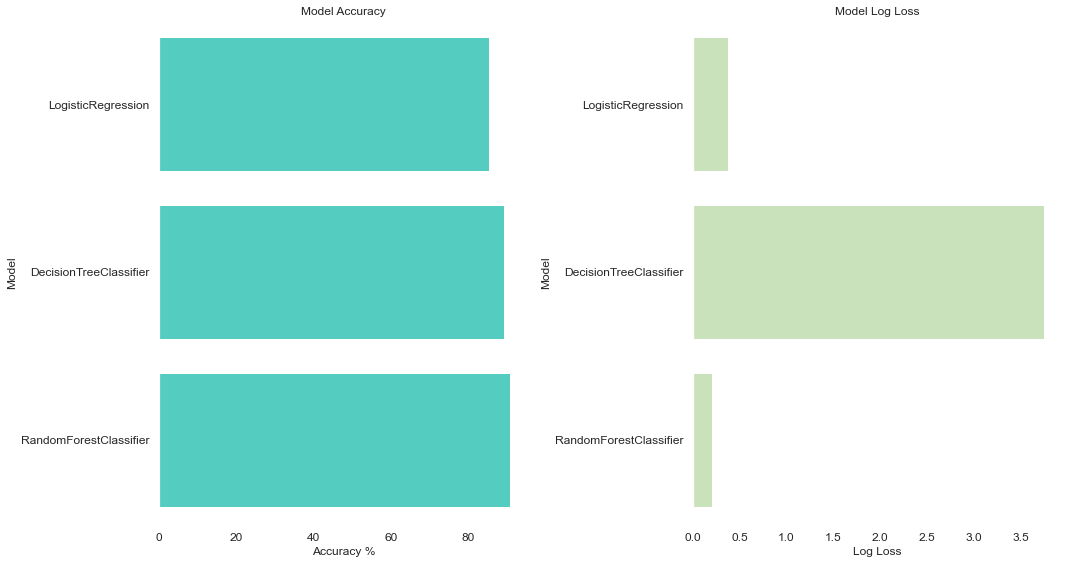

In [190]:
## Visualising the accuracy & log loss data
#select color picker from google(https://www.google.com/search?q=%2340E0D0&rlz=1C1VDKB_enIN1030IN1031&sxsrf=APwXEdcxjpD9ffV6E8v6M2BOj78g-jrY4w%3A1687759085498&ei=7SiZZPOHHpTZseMPsLCEUA&ved=0ahUKEwizsofGoOD_AhWUbGwGHTAYAQoQ4dUDCA8&uact=5&oq=%2340E0D0&gs_lcp=Cgxnd3Mtd2l6LXNlcnAQAzIKCAAQRxDWBBCwAzIKCAAQRxDWBBCwAzIKCAAQRxDWBBCwAzIKCAAQRxDWBBCwAzIKCAAQRxDWBBCwAzIKCAAQRxDWBBCwAzIKCAAQRxDWBBCwAzIKCAAQRxDWBBCwA0oECEEYAFAAWABgwAFoAXABeACAAQCIAQCSAQCYAQDAAQHIAQg&sclient=gws-wiz-serp#cobssid=s)

sns.set(rc={'axes.facecolor':'none','axes.grid':False,'xtick.labelsize':12,'ytick.labelsize':12, 'figure.autolayout':True})
plt.subplots(figsize=(15,8))

plt.subplot(1,2,1)
sns.set_color_codes("bright")
sns.barplot(x='Accuracy', y='Model', data=log, color='#40E0D0')
plt.xlabel('Accuracy %')
plt.title('Model Accuracy', fontdict={'fontsize':12})

plt.subplot(1,2,2)
sns.set_color_codes("bright")
sns.barplot(x='Log Loss', y='Model', data=log, color='#c7e9b4')
plt.xlabel('Log Loss')
plt.title('Model Log Loss', fontdict={'fontsize':12})

plt.show()

In [185]:
mdl = RandomForestClassifier()
mdl.fit(X_train, y_train)
y_pred=mdl.predict(X_test)
acc_rf = round(mdl.score(X_test, y_test) * 100, 2)
print("Model Name       :  RandomForestClassifier")
print('='*35)
print ("Model Accuracy   :  %i %% "%acc_rf)
print('='*35)
print("Training accuracy: ",mdl.score(X_train,y_train))
print('='*35)
print("Testing accuracy : ",mdl.score(X_test,y_test))

Model Name       :  RandomForestClassifier
Model Accuracy   :  90 % 
Training accuracy:  1.0
Testing accuracy :  0.9093337650773091


In [187]:
accuracy_score(y_pred,y_test)

0.9093337650773091

In [188]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95     10968
           1       0.59      0.61      0.60      1385

    accuracy                           0.91     12353
   macro avg       0.77      0.78      0.77     12353
weighted avg       0.91      0.91      0.91     12353



Confusion Matrix in Numbers
[[10393   575]
 [  545   840]]


 Confusion Matrix in Percentage
[[0.95 0.05]
 [0.39 0.61]]



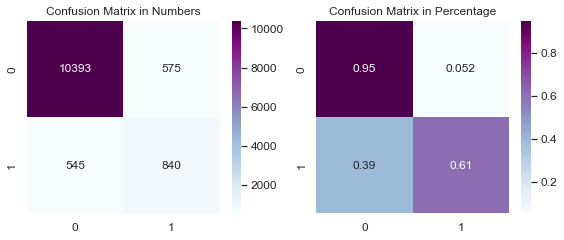

In [195]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

print ('Confusion Matrix in Numbers')
print (cnf_matrix)
print ('')

cnf_matrix_percent = cnf_matrix.astype('float') / cnf_matrix.sum(axis=1)[:, np.newaxis]

print ('\n', 'Confusion Matrix in Percentage')
print (cnf_matrix_percent)
print ('')



main_df_cnf_matrix = pd.DataFrame(cnf_matrix)

main_df_cnf_matrix_percent = pd.DataFrame(cnf_matrix_percent)

plt.subplots(figsize = (8,3.5))

plt.subplot(1,2,1)
plt.title("Confusion Matrix in Numbers", fontdict={'fontsize':12})
sns.heatmap(main_df_cnf_matrix, cmap='BuPu', annot=True, fmt='d')

plt.subplot(1,2,2)
plt.title("Confusion Matrix in Percentage", fontdict={'fontsize':12})
sns.heatmap(main_df_cnf_matrix_percent, cmap='BuPu', annot=True)

plt.show()


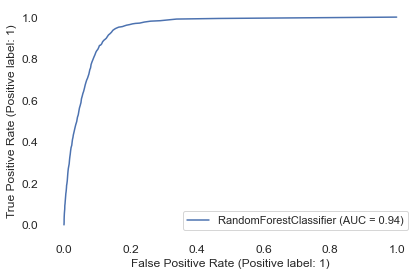

In [196]:
roc_disp = RocCurveDisplay.from_estimator(mdl, X_test, y_test)

In [209]:
# let me import Extra tree regressor

from sklearn.ensemble import ExtraTreesRegressor

selection = ExtraTreesRegressor()
selection.fit(X,Y)

ExtraTreesRegressor()

In [210]:
print(selection.feature_importances_)

[0.07 0.28 0.05 0.08 0.01 0.02 0.01 0.03 0.08 0.08 0.05 0.04 0.01 0.03
 0.02 0.01 0.02 0.05 0.01 0.05]


In [211]:
feat_importances  =  pd.Series(selection.feature_importances_,index = X.columns)

<AxesSubplot:>

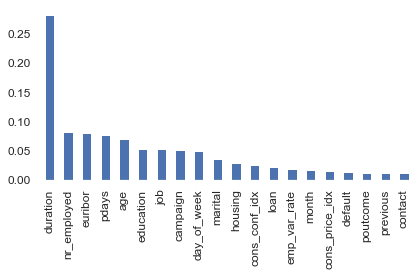

In [212]:
feat_importances.sort_values(ascending=False).plot(kind='bar')

In [213]:
X_imp = X[feat_importances.nlargest(21).index]

In [214]:
X_imp

,duration,nr_employed,euribor,pdays,age,education,job,campaign,day_of_week,marital,housing,cons_conf_idx,loan,emp_var_rate,month,cons_price_idx,default,poutcome,previous,contact
0,261,5191.00,4.86,999,56,3,3,1,1,1,0,-36.40,0,1.10,6,93.99,0,1,0,1
1,149,5191.00,4.86,999,57,6,7,1,1,1,0,-36.40,0,1.10,6,93.99,1,1,0,1
2,226,5191.00,4.86,999,37,6,7,1,1,1,2,-36.40,0,1.10,6,93.99,0,1,0,1
3,151,5191.00,4.86,999,40,4,0,1,1,1,0,-36.40,0,1.10,6,93.99,0,1,0,1
4,307,5191.00,4.86,999,56,6,7,1,1,1,0,-36.40,2,1.10,6,93.99,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,334,4963.60,1.03,999,73,8,5,1,0,1,2,-50.80,0,-1.10,7,94.77,0,1,0,0
41184,383,4963.60,1.03,999,46,8,1,1,0,1,0,-50.80,0,-1.10,7,94.77,0,1,0,0
41185,189,4963.60,1.03,999,56,7,5,2,0,1,2,-50.80,0,-1.10,7,94.77,0,1,0,0
41186,442,4963.60,1.03,999,44,8,9,1,0,1,0,-50.80,0,-1.10,7,94.77,0,1,0,0


In [216]:
X_train,X_test,y_train,y_test=train_test_split(X_imp,Y,test_size=.20,random_state=14)

In [217]:
train = pd.concat([X_train,y_train],axis=1)
train = train.reset_index(drop=True)
non_term = train[train.y == 0]
print('Non Term Deposit',len(non_term))
yes_term = train[train.y == 1]
print('yes Term Deposit =',len(yes_term))
yes_term_upsampled1= resample(yes_term,replace=True,n_samples=len(non_term),random_state=27)
new_train = pd.concat([non_term,yes_term_upsampled1])
new_train.y.value_counts()

Non Term Deposit 29278
yes Term Deposit = 3662


0    29278
1    29278
Name: y, dtype: int64

In [218]:
X_train=new_train.drop("y",axis=1)
y_train=new_train["y"]

In [224]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train.iloc[:,0:10]=scaler.fit_transform(X_train.iloc[:,0:10])
X_test.iloc[:,0:10]=scaler.transform(X_test.iloc[:,0:10])

In [225]:
RFC=RandomForestClassifier()
RFC.fit(X_train,y_train)
y_train_pred=RFC.predict(X_train)
y_test_pred=RFC.predict(X_test)
print(classification_report(y_train,y_train_pred))
print(confusion_matrix(y_train,y_train_pred))
print(classification_report(y_test,y_test_pred))
print(confusion_matrix(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     29278
           1       1.00      1.00      1.00     29278

    accuracy                           1.00     58556
   macro avg       1.00      1.00      1.00     58556
weighted avg       1.00      1.00      1.00     58556

[[29278     0]
 [    0 29278]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      7259
           1       0.62      0.63      0.63       977

    accuracy                           0.91      8236
   macro avg       0.79      0.79      0.79      8236
weighted avg       0.91      0.91      0.91      8236

[[6886  373]
 [ 361  616]]


In [226]:
from sklearn.model_selection import RandomizedSearchCV

In [227]:
n_estimators = [i for i in range(100,600,200)]
# Number of features to consider at every split
max_features = ['auto','sqrt']
# The depth of the tree max_depth
max_depth = [i for i in range(5,30,10)]
# Min samples required to split the node
min_sample_split = [2,5,10]
# Min no of samples required to each leaf to split                        ---- Pruning
min_samples_leaf = [1,2,5]

In [228]:
random_grid = {'n_estimators':n_estimators,
              'max_features':max_features,
              'max_depth':max_depth,
              'min_samples_split':min_sample_split,
              'min_samples_leaf':min_samples_leaf}

In [229]:
rf_model = RandomizedSearchCV(estimator = RFC,param_distributions = random_grid,cv=4,random_state = 0)
rf_model.fit(X_train,y_train)

RandomizedSearchCV(cv=4, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [5, 15, 25],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 300, 500]},
                   random_state=0)

In [230]:
rf_model.best_params_

{'n_estimators': 300,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 25}

In [231]:
mdl2=RandomForestClassifier(n_estimators=300,min_samples_split=2,min_samples_leaf=2,max_features='sqrt',max_depth=25)
mdl2.fit(X_train,y_train)
y_train_pred=mdl2.predict(X_train)
y_test_pred=mdl2.predict(X_test)

In [237]:
print('='*35)
print("Classification REPORT FOR TEST DATA")
print(classification_report(y_test,y_test_pred))
print('='*35)
print("CONFUSION MATRIX FOR TEST DATA")
print(confusion_matrix(y_test,y_test_pred))

Classification REPORT FOR TEST DATA
              precision    recall  f1-score   support

           0       0.97      0.93      0.95      7259
           1       0.58      0.77      0.66       977

    accuracy                           0.91      8236
   macro avg       0.77      0.85      0.80      8236
weighted avg       0.92      0.91      0.91      8236

CONFUSION MATRIX FOR TEST DATA
[[6719  540]
 [ 225  752]]


In [238]:
print('='*35)
print("Classification REPORT FOR TRAIN DATA")
print(classification_report(y_train,y_train_pred))
print('='*35)
print("Classification REPORT FOR TRAIN DATA")
print(confusion_matrix(y_train,y_train_pred))


Classification REPORT FOR TRAIN DATA
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     29278
           1       0.98      1.00      0.99     29278

    accuracy                           0.99     58556
   macro avg       0.99      0.99      0.99     58556
weighted avg       0.99      0.99      0.99     58556

Classification REPORT FOR TRAIN DATA
[[28761   517]
 [    0 29278]]
